# *Deliverable 1*: EDA (Exploratory Data Analysis)

* Import dataset and necessary libraries
<br><br>  
* Overview & Basic information about the dataset
  * Deleting unneeded columns
  * Detecting N/As & duplicates
  * Descriptive statistics
  * Range and value counts for each column
  * Visualisation histograms (values in each column and counts of instances)
<br><br>  
* Relationship between the columns
   * Scatterplots
   * Spearman
   * Pearson
   * Interactive 3d plot
<br><br>
* Outliers
   * Scatterplots
   * Boxplots
   * IQR method
<br><br>   
* Categorical analysis for brands
  * Visualisation of counts of car brands
  * Origin



## Import dataset and necessary libraries

In [32]:
!pip install plotly
!pip install -U nbformat==4.2.0 

  Using cached nbformat-4.2.0-py2.py3-none-any.whl.metadata (1.1 kB)
Using cached nbformat-4.2.0-py2.py3-none-any.whl (153 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.10.4
    Uninstalling nbformat-5.10.4:
      Successfully uninstalled nbformat-5.10.4


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import os 
nb_path = os.path.abspath('')
file_path = os.path.join(nb_path, '../../data/mpg.data.csv')

In [3]:
df = pd.read_csv(file_path)

## Overview & Basic info about the dataset


In [4]:
df

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,NaN,NaN,NaN,NaN
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,NaN,NaN,NaN,NaN
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,NaN,NaN,NaN,NaN
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   1 non-null      object 
dtypes: float64(7), int64(4), object(2)
memory usage: 41.4+ KB


- The dataset includes 9 input features, namely: mpg, cylinders, displayments, horsepower, weight, acceleration, model year, origin, car name and it is composed of 405  samples.

- The features "mpg", "displayments", "horsepower" and "acceleration" are 64-bit floating point numbers, while the "cylinders", "weight", "model year" and "origin" are 64-bit integer numbers and the "car name" is object.


### Delete unneeded columns

In [6]:
df = df.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'])

In [7]:
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [8]:
df.nunique(axis=0)

mpg             129
cylinders         5
displayments     83
horsepower       93
weight          356
acceleration     96
model year       13
origin            3
car name        312
dtype: int64

### Detect Missing Values & Duplicates

In [9]:
missing_values = df.isnull().sum()
missing_values

mpg             8
cylinders       0
displayments    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

- The feature "mpg" has 8 missing data and the feature "horsepower" has 6 missing data.

In [10]:
# find total duplicate entries and drop them if any
print(f'total duplicate rows: {df.duplicated().sum()}')

# drop duplicate rows if any
df = df[~df.duplicated()]
df.shape

total duplicate rows: 0


(406, 9)

### Descriptive statistics

In [11]:
df.describe()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Range & count of values of the different columns in the dataset

In [12]:
# print the range of the features
for i in df.columns[:8]:
    print(f"The range of the feature'{i}' is [{df[i].min()},{df[i].max()}]")

The range of the feature'mpg' is [9.0,46.6]
The range of the feature'cylinders' is [3,8]
The range of the feature'displayments' is [68.0,455.0]
The range of the feature'horsepower' is [46.0,230.0]
The range of the feature'weight' is [1613,5140]
The range of the feature'acceleration' is [8.0,24.8]
The range of the feature'model year' is [70,82]
The range of the feature'origin' is [1,3]


In [13]:
# dic for percentages
percentages_dict = {}

# Select numerical columns
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

for col in numerical_columns:
    # unique value counts
    print(f"Value counts for {col}:")

    # columns with decimals
    if col == 'mpg' or col == 'acceleration':  # Corrected condition
        df[col] = df[col].round(1)  # Round mpg and acceleration values to 1 decimal place

    # print value counts
    value_counts = df[col].value_counts()
    print(value_counts)

    # printing the most frequent value and its count
    most_frequent_value = value_counts.idxmax()
    most_frequent_count = value_counts.max()
    print(f"The most frequent value in {col} is {most_frequent_value} with {most_frequent_count} occurrences.")

    # store percentages for the column
    percentages = ((value_counts / value_counts.sum()) * 100).round(2)
    percentages_dict[col] = percentages

    print("\n" + "-"*40 + "\n")

Value counts for mpg:
mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64
The most frequent value in mpg is 13.0 with 20 occurrences.

----------------------------------------

Value counts for cylinders:
cylinders
4    207
8    108
6     84
3      4
5      3
Name: count, dtype: int64
The most frequent value in cylinders is 4 with 207 occurrences.

----------------------------------------

Value counts for displayments:
displayments
97.0     22
350.0    19
98.0     18
250.0    17
318.0    17
         ..
83.0      1
171.0     1
115.0     1
101.0     1
144.0     1
Name: count, Length: 83, dtype: int64
The most frequent value in displayments is 97.0 with 22 occurrences.

----------------------------------------

Value counts for horsepower:
horsepower
150.0    22
90.0     20
88.0     19
110.0    19
100.0    17
         ..
122.0     1
61.0      1
93.0      1
148.0     1
82.0     

In [14]:
# percentages for each met value
for col, percentages in percentages_dict.items():
    print(f"Percentage of each value in {col}:")

    percentages = percentages.apply(lambda x: f"{x}%")

    print(percentages)
    print("\n" + "-"*40 + "\n")

Percentage of each value in mpg:
mpg
13.0    5.03%
14.0    4.77%
18.0    4.27%
15.0    4.02%
26.0    3.52%
        ...  
31.9    0.25%
16.9    0.25%
18.2    0.25%
22.3    0.25%
44.0    0.25%
Name: count, Length: 129, dtype: object

----------------------------------------

Percentage of each value in cylinders:
cylinders
4    50.99%
8     26.6%
6    20.69%
3     0.99%
5     0.74%
Name: count, dtype: object

----------------------------------------

Percentage of each value in displayments:
displayments
97.0     5.42%
350.0    4.68%
98.0     4.43%
250.0    4.19%
318.0    4.19%
         ...  
83.0     0.25%
171.0    0.25%
115.0    0.25%
101.0    0.25%
144.0    0.25%
Name: count, Length: 83, dtype: object

----------------------------------------

Percentage of each value in horsepower:
horsepower
150.0     5.5%
90.0      5.0%
88.0     4.75%
110.0    4.75%
100.0    4.25%
         ...  
122.0    0.25%
61.0     0.25%
93.0     0.25%
148.0    0.25%
82.0     0.25%
Name: count, Length: 93, dtyp

Here we wanted to show the percentages of each seperate value count met on the dataset.
Our focus fell on cylinders and origin where there is a clear dominance of one value

**Cylinders:**

4:    50.99%

8:     26.6%

6:    20.69%

3:     0.99%

5:     0.74%

**Origin:**

1:    62.56%

3:    19.46%

2:    17.98%

### Visualisation histograms
x axis: values of instances


y axis: counts of each value

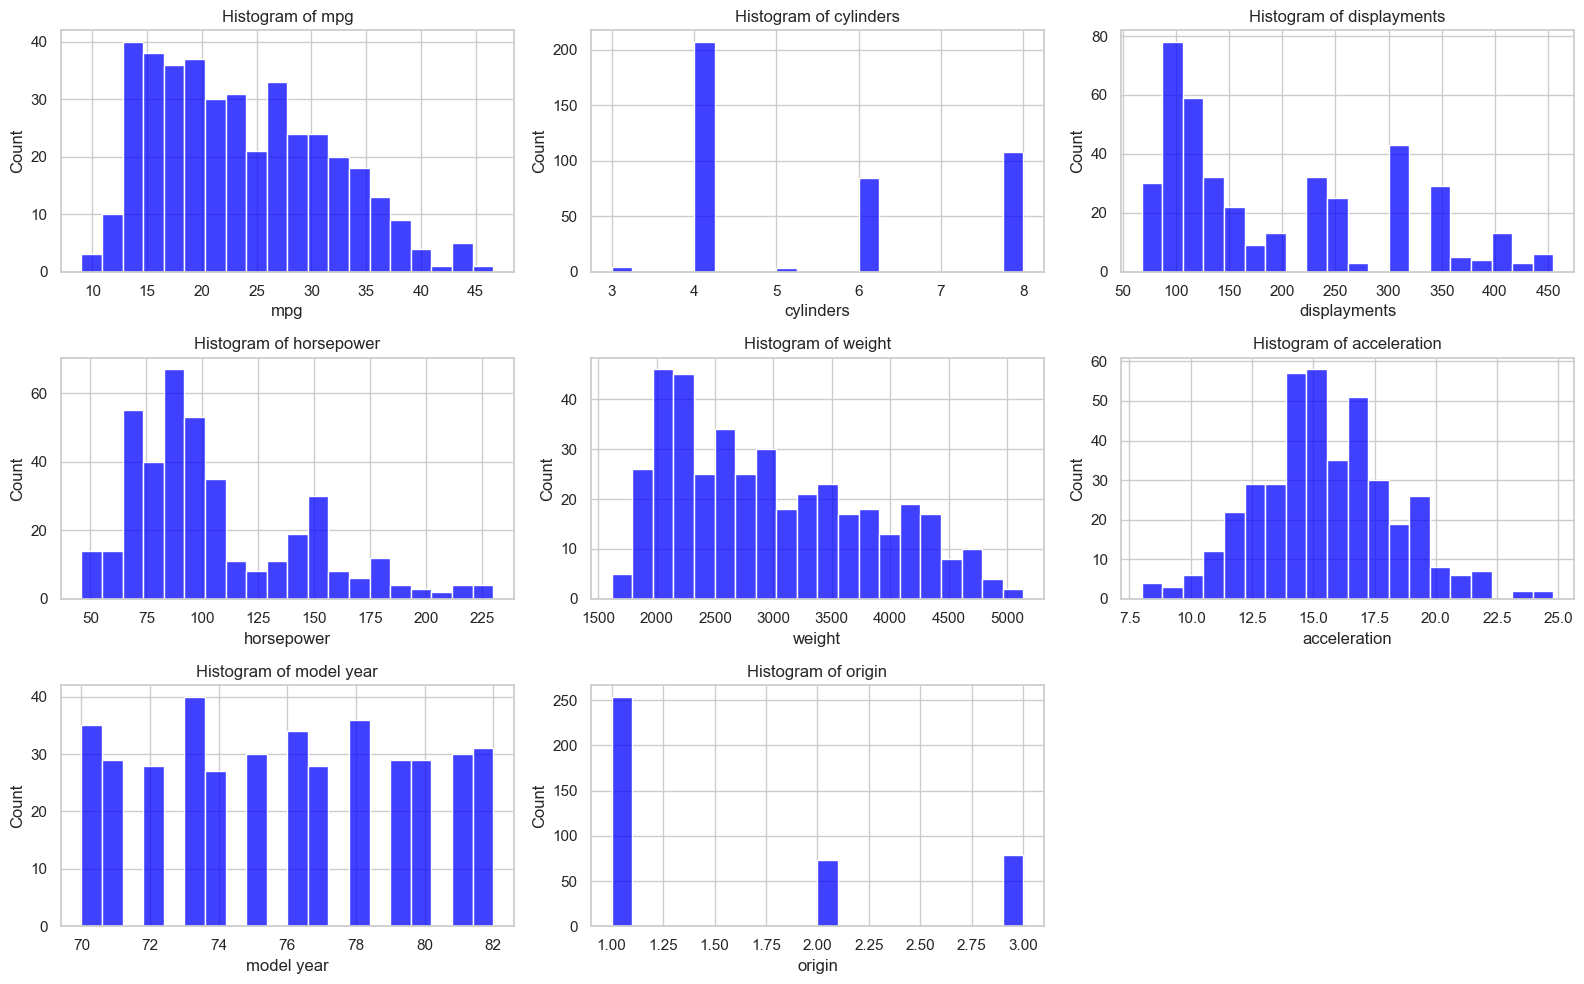

In [15]:
sns.set_theme(style="whitegrid")
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, color='blue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

## Relationship between the columns

### Scatterplots

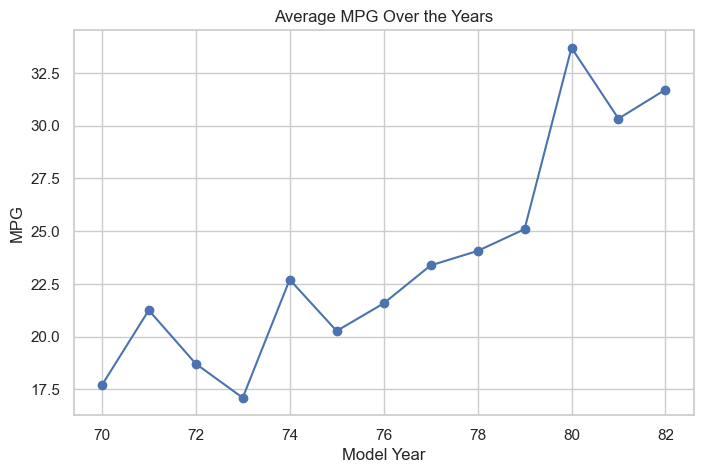

In [16]:
#MPG Trends Over the Years

df.groupby("model year")["mpg"].mean().plot(marker="o", figsize=(8, 5))
plt.title("Average MPG Over the Years")
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.show()

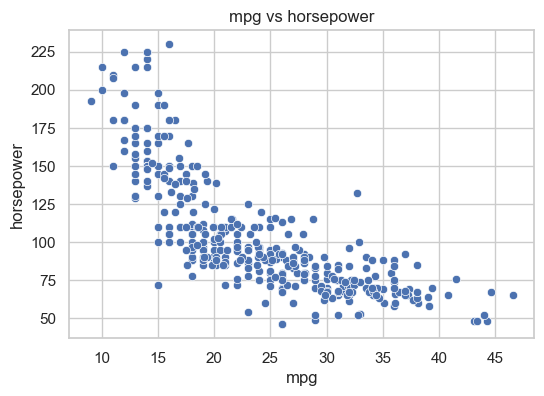

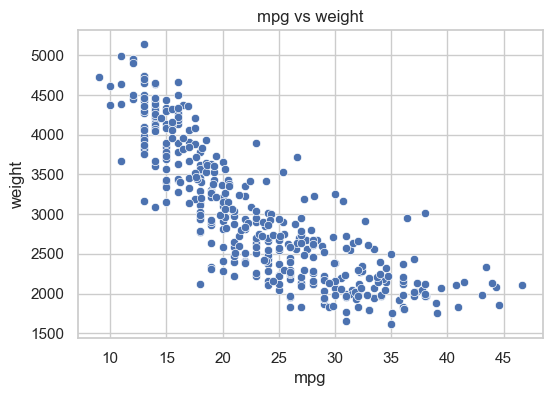

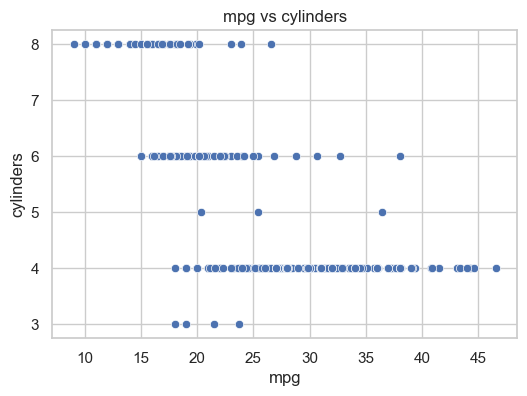

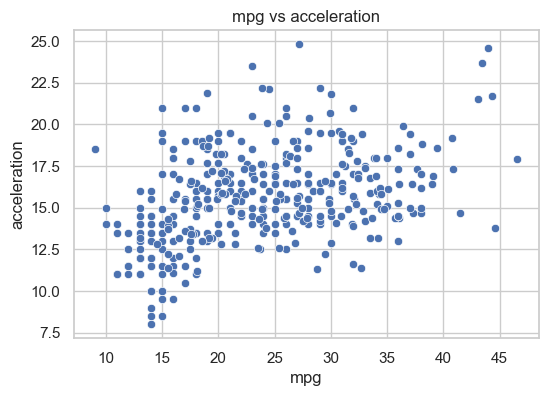

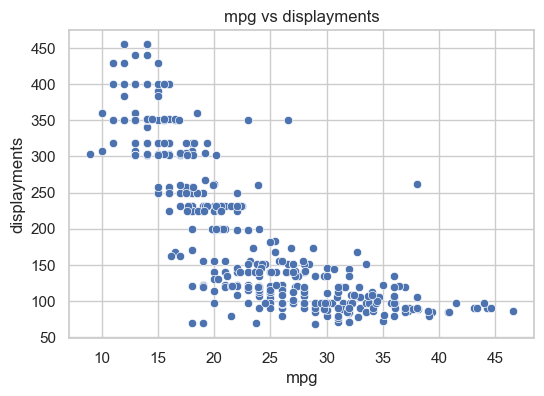

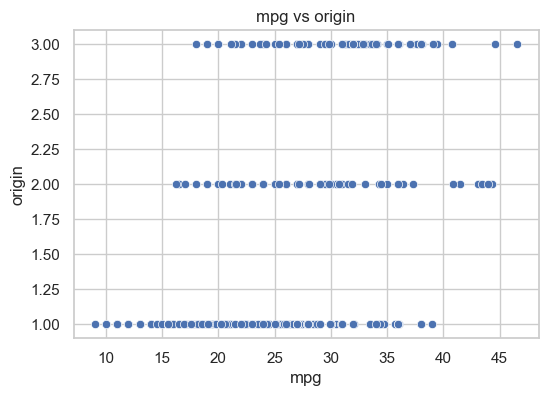

In [17]:
# columns
columns = ['horsepower', 'weight', 'cylinders', 'acceleration', 'displayments','origin']

# scatter plots between mpg and columns
for col in columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x='mpg', y=col)
    plt.title(f'mpg vs {col}')
    plt.xlabel('mpg')
    plt.ylabel(col)
    plt.show

- The relationships between "mpg" with "displayments", "horsepower", "weight", are strong negative monotonic.
- Between the "mpg" and "acceleration" there seems to be a weak positive monotonic trend, although the scatter plot shows significant variability.

### Spearman Correlation
We use this type of correlation because our data (mpg and displacements, weight, horsepower) are not linear
+ Monotonic distributions
+ Robust to outliers
+ Measures the direction - the strength of a relationship

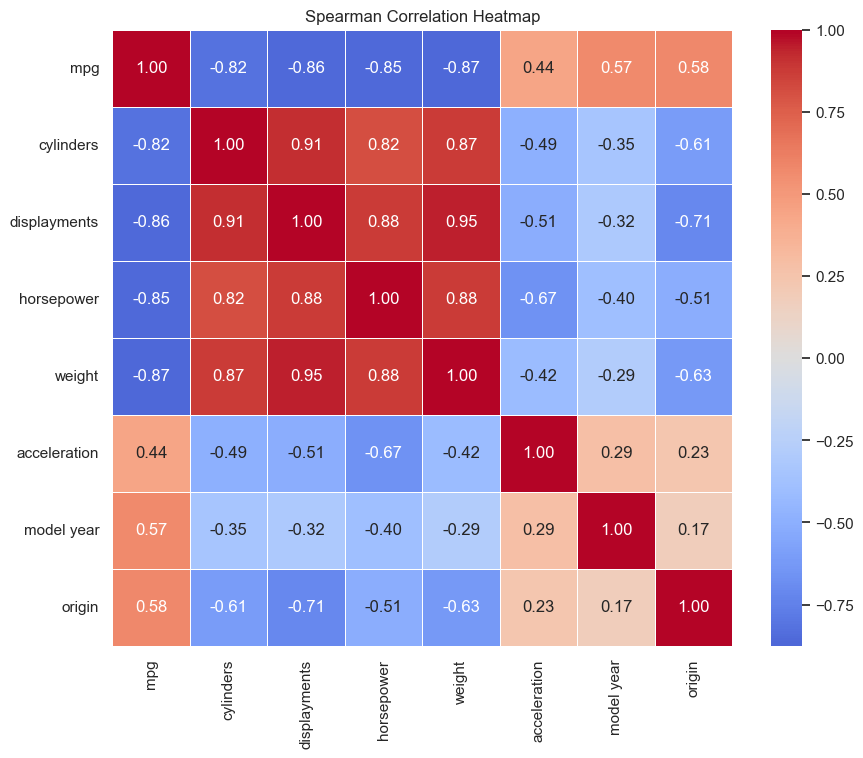

In [18]:
# spearman correlation
spearman_correlation = df[numerical_columns].corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('Spearman Correlation Heatmap')
plt.show()


- After performing Spearman correlation it is obvious that the greatest correlation of "mpg" is met upon: "weight", "displayments", "horsepower", "cylinders".

### Pearson heatmap

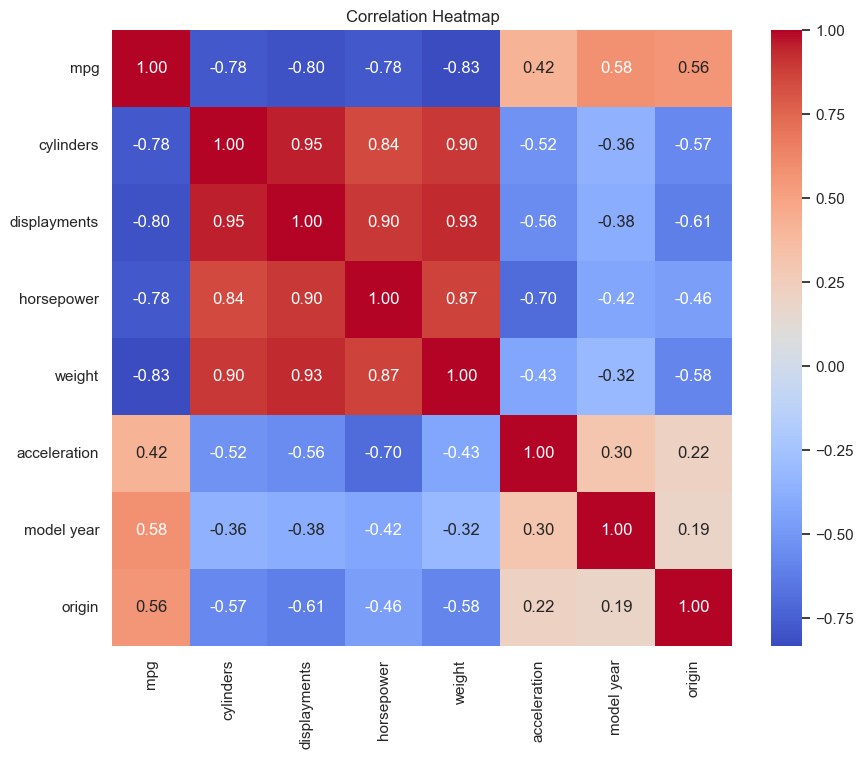

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

- From the pearson heatmap it is also evident that "cylinders", "displayments", "horse power" and "weight" are the features that mostly affect the "mpg".

### Interactive plot for the 2 most highly correlated to mpg features

In [20]:
# Create Interactive 3D Scatter Plot
fig = px.scatter_3d(
    df,
    x="weight",
    y="displayments",
    z="mpg",
    color="mpg",  # Color by MPG
    title="Interactive 3D Scatter Plot: MPG vs Weight vs Displacement",
    labels={"Weight": "Weight", "Displacement": "Displacement", "MPG": "Miles Per Gallon"}
)

# Adjust the size of the plot
fig.update_layout(
    width=1000,  # Set the width in pixels
    height=800   # Set the height in pixels
)

# Show the Plot
fig.show()

Lightweight Cars with Small Engines (left side, lower displacement, red points):
These cars tend to have high MPG values (fuel-efficient).

Heavyweight Cars with Large Engines (right side, higher displacement, blue points):
These cars are less fuel-efficient, as seen by their low MPG.

## Detecting Outliers

### Scatterplots

In [21]:
import plotly.express as px

# Scatter plots for each column's values using plotly for interactivity
for column in columns:
    fig = px.scatter(df, x=column, y=column, title=f'Scatter Plot of {column}')
    fig.update_layout(
        width=900,  # You can adjust the width and height
        height=900,
        xaxis_title=column,
        yaxis_title=column
    )
    fig.show()


### Boxplots

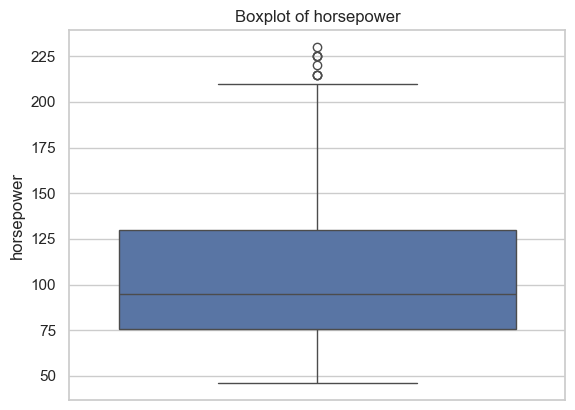

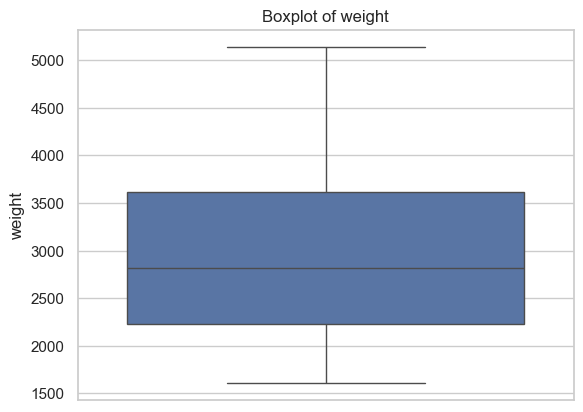

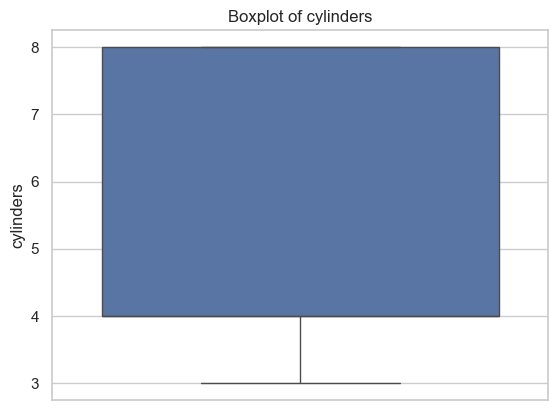

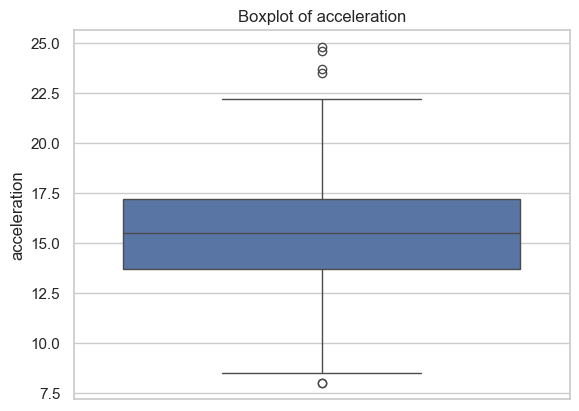

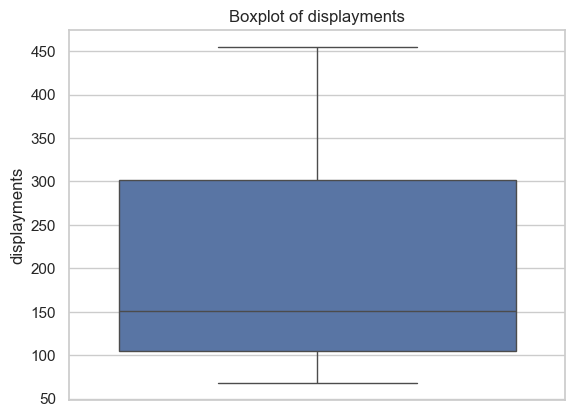

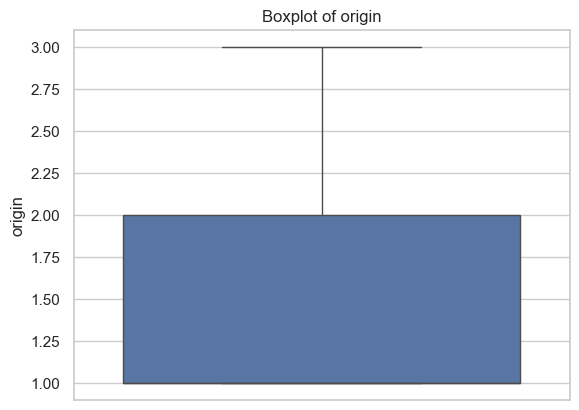

In [22]:
# Loop through each column and plot a boxplot
for col in columns:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### IQR method for outliers

In [23]:
import numpy as np

# Columns to analyze for outliers
columns = ['mpg', 'displayments', 'horsepower', 'weight', 'acceleration']

# Detect outliers using the IQR method
outliers = pd.DataFrame(index=df.index)  # Initialize outliers DataFrame
for col in columns:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)  # Mark outliers

# Combine outlier masks across all columns
outliers['is_outlier'] = outliers.any(axis=1)  # True if row is an outlier in any column

# Add an "outlier" column to the main DataFrame
df['outlier'] = np.where(outliers['is_outlier'], 'Outlier', 'Normal')

# Output a list of all outliers
outlier_list = df[df['outlier'] == 'Outlier']
outlier_list

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,outlier
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,Outlier
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,Outlier
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,Outlier
16,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340,Outlier
17,NaN,8,302.0,140.0,3353,8.0,70,1,ford mustang boss 302,Outlier
19,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw),Outlier
31,10.0,8,360.0,215.0,4615,14.0,70,1,ford f250,Outlier
66,23.0,4,97.0,54.0,2254,23.5,72,2,volkswagen type 3,Outlier
101,13.0,8,440.0,215.0,4735,11.0,73,1,chrysler new yorker brougham,Outlier
102,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom,Outlier


## Categorical Values

Checking what car brands are seen most often in the dataset



In [24]:
from collections import Counter
import re

if 'car name' in df.columns:
    car_names = df['car name']

    # tokenizing
    all_words = []
    for name in car_names:
        words = re.findall(r'\w+', name.lower())  # split and lowercase
        all_words.extend(words)

    # frequency of words
    word_counts = Counter(all_words)

    # most common
    most_common_words = word_counts.most_common(50)

most_common_words

[('ford', 53),
 ('chevrolet', 44),
 ('plymouth', 32),
 ('sw', 32),
 ('amc', 29),
 ('dodge', 28),
 ('toyota', 25),
 ('datsun', 23),
 ('custom', 18),
 ('buick', 17),
 ('pontiac', 16),
 ('volkswagen', 16),
 ('honda', 13),
 ('mercury', 11),
 ('brougham', 10),
 ('corolla', 10),
 ('oldsmobile', 10),
 ('mazda', 10),
 ('rabbit', 10),
 ('malibu', 8),
 ('torino', 8),
 ('corona', 8),
 ('peugeot', 8),
 ('pinto', 8),
 ('fiat', 8),
 ('civic', 8),
 ('chevelle', 7),
 ('ii', 7),
 ('audi', 7),
 ('matador', 7),
 ('colt', 7),
 ('2', 7),
 ('diesel', 7),
 ('fury', 6),
 ('mustang', 6),
 ('chrysler', 6),
 ('gran', 6),
 ('volvo', 6),
 ('century', 6),
 ('classic', 6),
 ('vw', 6),
 ('l', 6),
 ('glc', 6),
 ('satellite', 5),
 ('hornet', 5),
 ('maverick', 5),
 ('deluxe', 5),
 ('504', 5),
 ('saab', 5),
 ('vega', 5)]

### Brands

In [25]:
# splitting last column, taking first token of 'car name' as a seperate column and the rest as the model of the car
df[['car brand', 'model']] = df['car name'].str.extract(r'^(\S+)\s*(.*)$')

df['car brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'citroen', 'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot',
       'audi', 'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [26]:
brand_mapping = {
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'chevy': 'chevrolet',
    'chevroelt': 'chevrolet',
    'mercedes-benz': 'mercedes',
    'mercedes': 'mercedes',
    'toyouta': 'toyota',
    'toyota': 'toyota',
     'maxda': 'mazda',
    'capri': 'mercury',

}

# standardize car brands
df['car brand'] = df['car brand'].replace(brand_mapping)

# recalculate the counts of car brands after mapping
car_brand_counts = df['car brand'].value_counts()

car_brand_counts

car brand
ford          53
chevrolet     48
plymouth      32
amc           29
dodge         28
toyota        26
datsun        23
volkswagen    23
buick         17
pontiac       16
honda         13
mercury       12
mazda         12
oldsmobile    10
peugeot        8
fiat           8
audi           7
chrysler       6
volvo          6
renault        5
saab           5
opel           4
subaru         4
mercedes       3
bmw            2
cadillac       2
triumph        1
hi             1
citroen        1
nissan         1
Name: count, dtype: int64

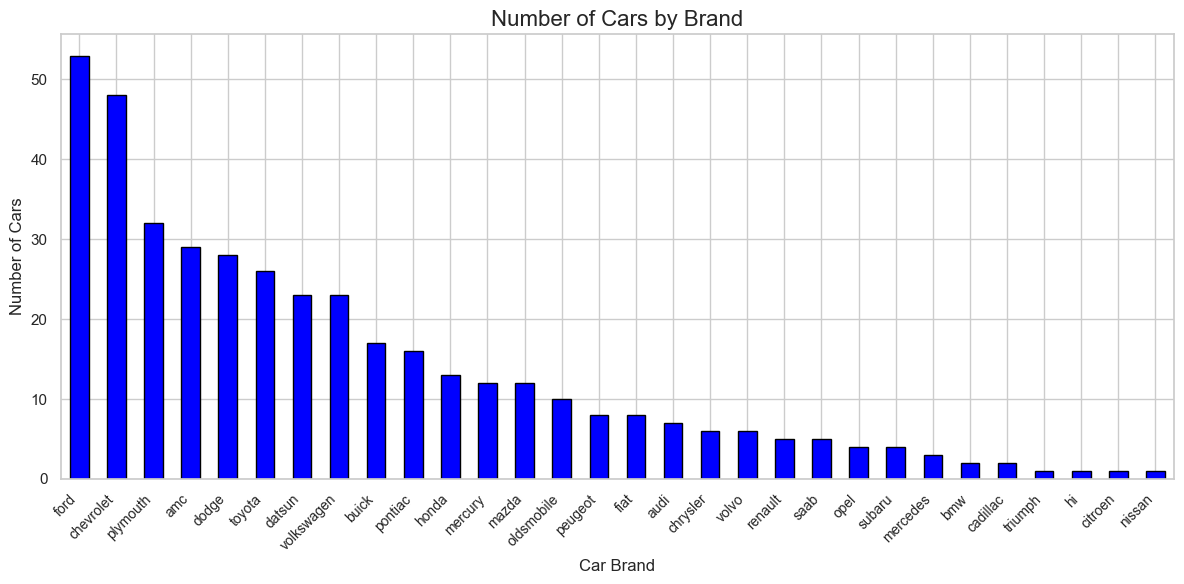

In [27]:
# histogram of cars by brand
plt.figure(figsize=(12, 6))
car_brand_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Cars by Brand', fontsize=16)
plt.xlabel('Car Brand', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
# plot
plt.show()

Mean MPG by Car Brand (with enough instances and valid MPG):
car brand
honda         33.761538
volkswagen    31.840909
datsun        31.113043
mazda         30.058333
toyota        28.165385
dodge         22.060714
plymouth      21.703226
oldsmobile    21.100000
chevrolet     20.219149
pontiac       20.012500
ford          19.694118
mercury       19.608333
buick         19.182353
amc           18.246429
Name: mpg, dtype: float64


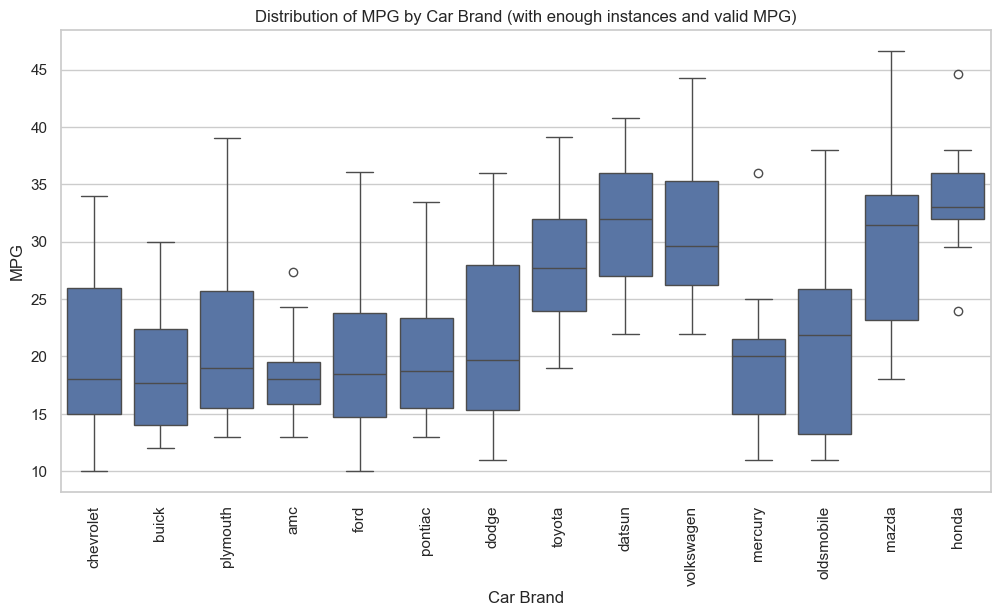

In [28]:
# Filter the dataset to include only rows where 'mpg' is not missing
valid_data = df[df['mpg'].notna()]

# Set a threshold for the minimum number of instances per car brand (e.g., 10 instances)
min_instances = 10

# Get the count of instances per car brand
brand_counts = valid_data['car brand'].value_counts()

# Filter car brands that have at least 'min_instances' and valid 'mpg' values
valid_brands = brand_counts[brand_counts >= min_instances].index
filtered_data = valid_data[valid_data['car brand'].isin(valid_brands)]

# 1. Descriptive statistics: Mean MPG by Car Brand (excluding missing values and small brands)
mpg_by_brand = filtered_data.groupby('car brand')['mpg'].mean().sort_values(ascending=False)
print("Mean MPG by Car Brand (with enough instances and valid MPG):")
print(mpg_by_brand)

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='car brand', y='mpg')
plt.title('Distribution of MPG by Car Brand (with enough instances and valid MPG)')
plt.xlabel('Car Brand')
plt.ylabel('MPG')
plt.xticks(rotation=90)
plt.show()



We created boxplots to visualize the distribution of MPG across different car brands.However, to ensure meaningful analysis, we focused only on car brands with more than 10 instances. This was critical because analyzing brands with very few data points could lead to unreliable or misleading conclusions.

Volkswagen, Mazda, Datsun and Honda showing the highest average MPG values, while brands like Ford, Mercury, Buick, and Amc tend to have lower MPG values.


Mean MPG by Origin and Number of Cars per Origin:
origin
3    30.450633
2    27.891429
1    20.083534
Name: mpg, dtype: float64 origin
1    249
3     79
2     70
Name: count, dtype: int64


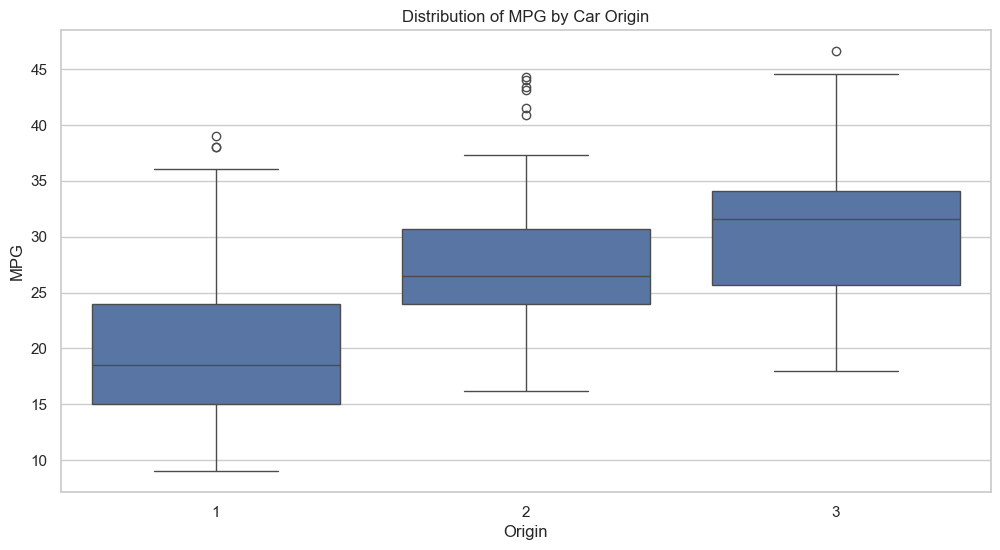

In [29]:
# Descriptive statistics: Mean MPG by Origin
mpg_by_origin = valid_data.groupby('origin')['mpg'].mean().sort_values(ascending=False)
car_count_per_origin = valid_data['origin'].value_counts()
print("Mean MPG by Origin and Number of Cars per Origin:")
print(mpg_by_origin, car_count_per_origin)

#  Boxplot: Distribution of MPG by Origin
plt.figure(figsize=(12, 6))
sns.boxplot(data=valid_data, x='origin', y='mpg')
plt.title('Distribution of MPG by Car Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.xticks(rotation=0)
plt.show()




Origin 3 (Japan) likely corresponds to more fuel-efficient cars on average, while Origin 1 (USA) cars tend to have lower MPG. Origin 2 (Europe) lies in the between

In [30]:
# saving to a new file 
df.to_csv(os.path.join(nb_path, '../../data/df_eda.csv'), index=False)

In [31]:
!jupyter nbconvert --to script D1.ipynb

[NbConvertApp] Converting notebook D1.ipynb to script
[NbConvertApp] Writing 13028 bytes to D1.py
